# Preliminary Data exploration

Load dataset with all metadata and pre-processing steps.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../Materials/Merged_Dataset.csv', encoding='utf-8', index_col=False)
# Drop the column Unnamed: 0
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Season,Directors,Title_Language,Leaflet_Language,Opmerking
0,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,903641,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
1,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,316913,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
2,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,135474,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
3,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,520507,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
4,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,446314,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN


In [3]:
# Make dataframes with two specific time periods

# df1933_1946 is the df with the seasons 1933 to 1946 (the new dataset)
df1933_1946 = df[(df['Season'] >= '1933-1934') & (df['Season'] <= '1945-1946')]

# df1940_1945 is the df with the seasons 1940 to 1945 (season 1944/1945 ends on the 31st of July 1945, two months before the end of the war)
df1940_1945 = df[(df['Season'] >= '1940-1941') & (df['Season'] <= '1944-1945')]

## TOP 10 Productions

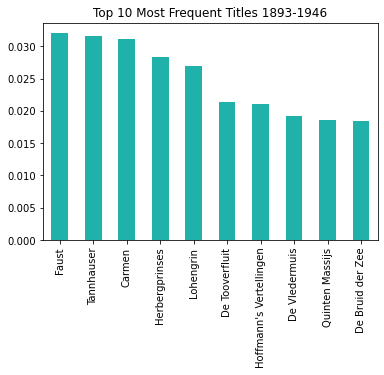

In [4]:
# Normalised Titles 1893-1946
df['Normalised title'].value_counts(normalize=True).head(10).plot(kind='bar', color = 'lightseagreen')
plt.title("Top 10 Most Frequent Titles 1893-1946");

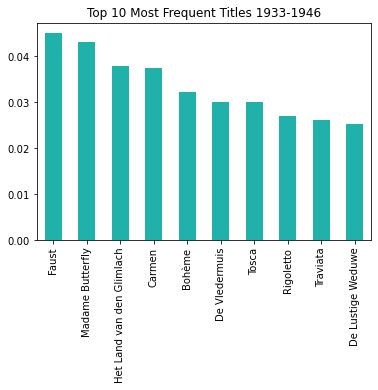

In [5]:
# Normalised Titles 1933-1946
df1933_1946['Normalised title'].value_counts(normalize=True).head(10).plot(kind='bar', color = 'lightseagreen')
plt.title("Top 10 Most Frequent Titles 1933-1946");

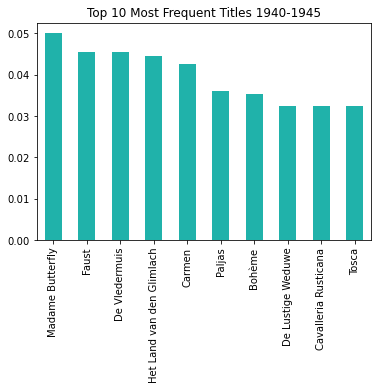

In [6]:
## Normalised Titles 1940-1945
df1940_1945['Normalised title'].value_counts(normalize=True).head(10).plot(kind='bar', color = 'lightseagreen')
plt.title("Top 10 Most Frequent Titles 1940-1945");

### Top Composers 1893-1946

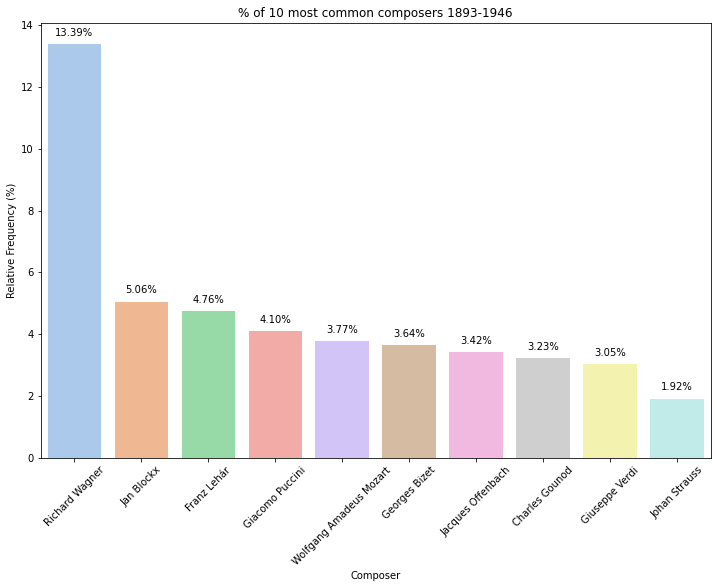

In [7]:
# Calculate the relative frequency of the top 10 composers
comp = df['Composer'].value_counts(normalize=True).head(10)

# Plot the results with a larger figure size
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=comp.index, y=comp.values * 100, palette='pastel')  # Multiply by 100 to convert to percentage
plt.title('% of 10 most common composers 1893-1946')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency (%)')
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
for i, value in enumerate(comp.values * 100):
    plt.text(i, value + 0.2, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

### Top Dutch Composers 1893-1946

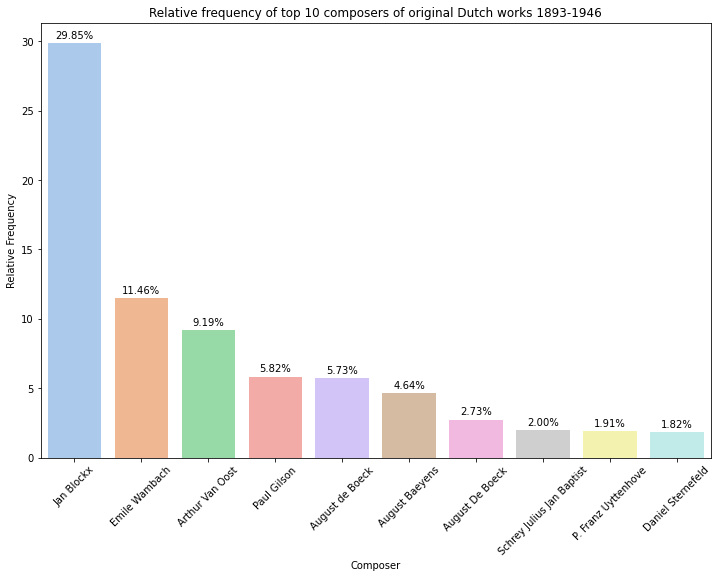

In [8]:
# Isolate all Dutch productions
df_nl = df[df["Original language"] == 'NL']

# Count the frequency of Dutch composers
nl = df_nl['Composer'].value_counts(normalize=True).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=nl.index, y=nl.values * 100, palette='pastel')  # Multiply by 100 to convert to percentage
plt.title('Relative frequency of top 10 composers of original Dutch works 1893-1946')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
for i, value in enumerate(nl.values * 100):
    plt.text(i, value + 0.2, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

### Top Composers 1933-1946

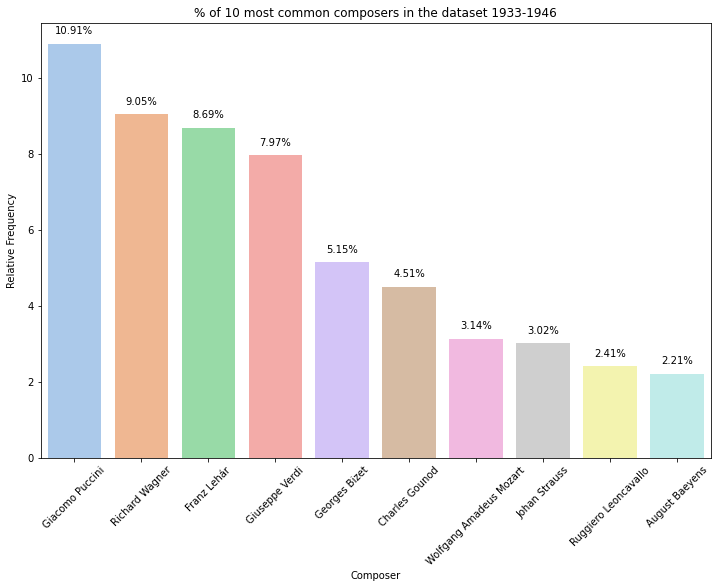

In [9]:
comp = df1933_1946['Composer'].value_counts(normalize=True).head(10)
plt.figure(figsize=(12,8))
ax = sns.barplot(x=comp.index, y=comp.values * 100, palette='pastel')  # Multiply by 100 to convert to percentage
plt.title('% of 10 most common composers in the dataset 1933-1946')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
for i, value in enumerate(comp.values * 100):
    plt.text(i, value + 0.2, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

### Top Dutch Composers 1933-1946

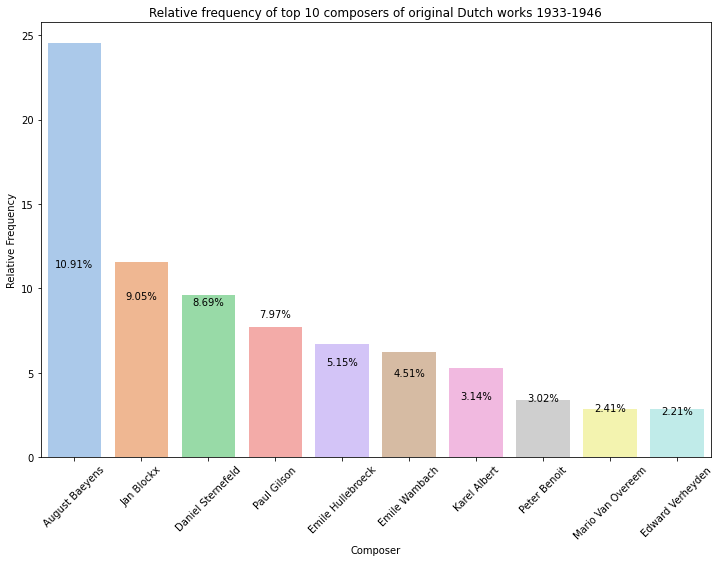

In [10]:
# Isolate all Dutch productions
df3 = df1933_1946[df1933_1946["Original language"] == 'NL']

nl = df3['Composer'].value_counts(normalize=True).head(10)
plt.figure(figsize=(12,8))
ax = sns.barplot(x=nl.index, y=nl.values * 100, palette='pastel')
plt.title('Relative frequency of top 10 composers of original Dutch works 1933-1946')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
# Add percentage labels on top of the bars
for i, value in enumerate(comp.values * 100):
    plt.text(i, value + 0.2, f'{value:.2f}%', ha='center', va='bottom')
plt.show()

### Top Composers 1940-1945

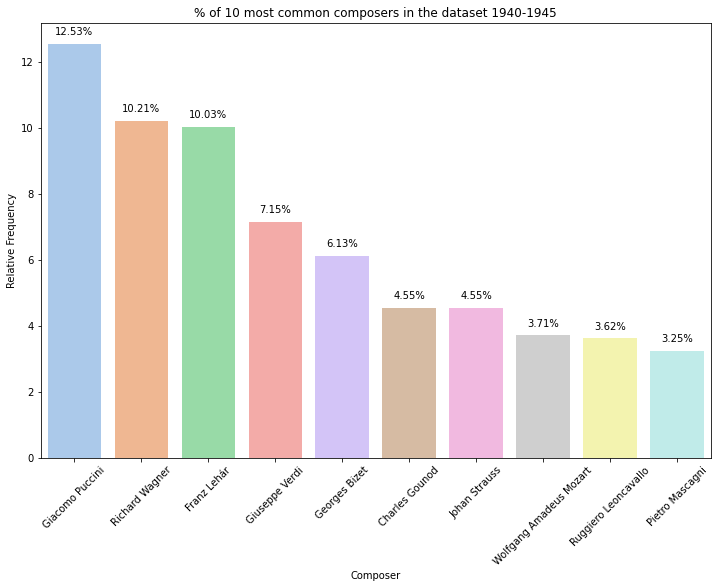

In [11]:
# Calculate the relative frequency of composers
comp = df1940_1945['Composer'].value_counts(normalize=True).head(10)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=comp.index, y=comp.values * 100, palette='pastel')  # Multiply by 100 to convert to percentage

plt.title('% of 10 most common composers in the dataset 1940-1945')
plt.xlabel('Composer')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
for i, value in enumerate(comp.values * 100):
    plt.text(i, value + 0.2, f'{value:.2f}%', ha='center', va='bottom')
plt.show()

In [12]:
# Print the top productions of the top 10 composers of the seasons from 1940 to 1945

# Calculate the relative frequency of composers for the seasons 1940-1945
comp_seasons = df1940_1945['Composer'].value_counts(normalize=True).head(10)

# Display the relative frequency for each composer
print("Relative Frequency of Top 10 Composers in Seasons 1940-1945:")
print(comp_seasons)

# Display the normalized titles for each composer in the top 10 with percentage for the entire period 1940-1945
top_composers_seasons = comp_seasons.index.tolist()

# Calculate the total performances for the entire period 1940-1945
total_performances_all = df1940_1945.shape[0]

for composer in top_composers_seasons:
    composer_df = df1940_1945[df1940_1945['Composer'] == composer]
    titles_count = composer_df.groupby('Normalised title').size().reset_index(name='Count')
    titles_count['Percentage'] = (titles_count['Count'] / total_performances_all) * 100
    print(f"\nTop Productions for {composer} in Seasons 1940-1945:")
    print(titles_count)

Relative Frequency of Top 10 Composers in Seasons 1940-1945:
Giacomo Puccini            0.125348
Richard Wagner             0.102136
Franz Lehár                0.100279
Giuseppe Verdi             0.071495
Georges Bizet              0.061281
Charles Gounod             0.045497
Johan Strauss              0.045497
Wolfgang Amadeus Mozart    0.037140
Ruggiero Leoncavallo       0.036212
Pietro Mascagni            0.032498
Name: Composer, dtype: float64

Top Productions for Giacomo Puccini in Seasons 1940-1945:
   Normalised title  Count  Percentage
0            Bohème     38    3.521779
1  Madame Butterfly     54    5.004634
2     Manon Lescaut      8    0.741427
3             Tosca     35    3.243744

Top Productions for Richard Wagner in Seasons 1940-1945:
                   Normalised title  Count  Percentage
0   De Meesterzangers van Nurenberg     13    1.204819
1            De Vliegende Hollander      9    0.834106
2                        De Walkure     17    1.575533
3               

## Distribution of Wagner and German productions

In [13]:
#create a subdataset with all Wagner performances 1893-1946
wag = df[df['Composer'] == 'Richard Wagner']
DUI = df[df['Original language'] == 'DUI']

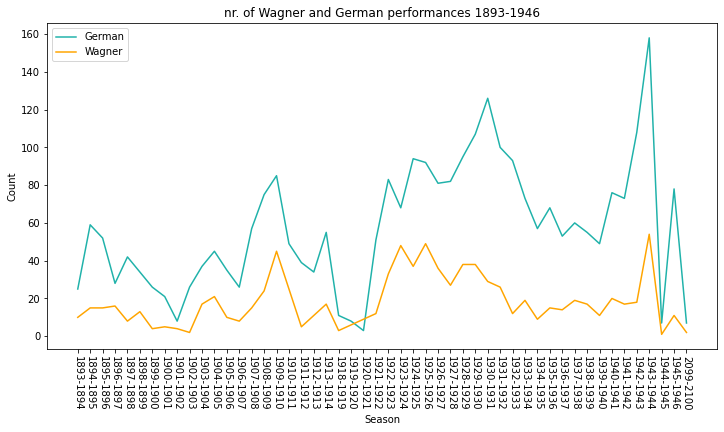

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

#create 2 series: one for all German performances and one for only the wagner performances
counts1 = DUI['Season'].value_counts().sort_index(axis=0)
counts2 = wag['Season'].value_counts().sort_index(axis=0)

#sort the index so that the seasons occur chronologically on the plot.
counts2 = counts2.sort_index()
counts1 = counts1.sort_index()

# Generate x and y data for the line plot, otherwise it doesn't plot all the index labels
x = counts1.index
y = counts1.values

x2 = counts2.index
y2 = counts2.values

#we make a lineplot
ax.plot(x, y, color='lightseagreen', label='German')
ax.plot(x2, y2, color = 'orange', label = 'Wagner')

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.legend()
ax.set_title('nr. of Wagner and German performances 1893-1946')

plt.show()

In [15]:
#create a subdataset with all Wagner performances 1933-1946
wag = df1933_1946[df1933_1946['Composer'] == 'Richard Wagner']
DUI = df1933_1946[df1933_1946['Original language'] == 'DUI']

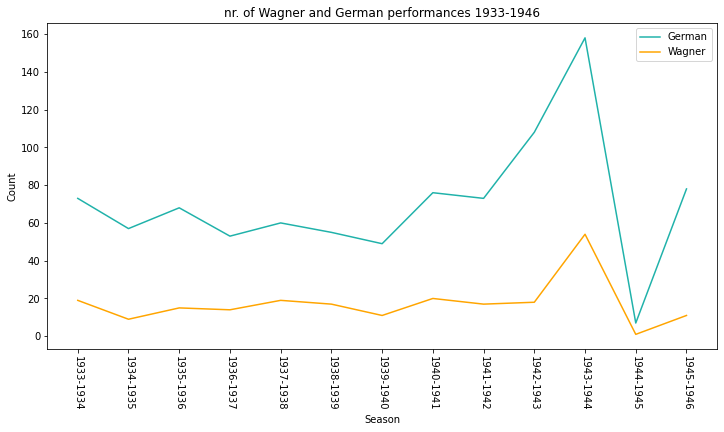

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

#create 2 series: one for all German performances and one for only the wagner performances
counts1 = DUI['Season'].value_counts().sort_index(axis=0)
counts2 = wag['Season'].value_counts().sort_index(axis=0)

#sort the index so that the seasons occur chronologically on the plot.
counts2 = counts2.sort_index()
counts1 = counts1.sort_index()

# Generate x and y data for the line plot, otherwise it doesn't plot all the index labels
x = counts1.index
y = counts1.values

x2 = counts2.index
y2 = counts2.values

#we make a lineplot
ax.plot(x, y, color='lightseagreen', label='German')
ax.plot(x2, y2, color = 'orange', label = 'Wagner')

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.legend()
ax.set_title('nr. of Wagner and German performances 1933-1946')

plt.show()

## French, Italian, German performances

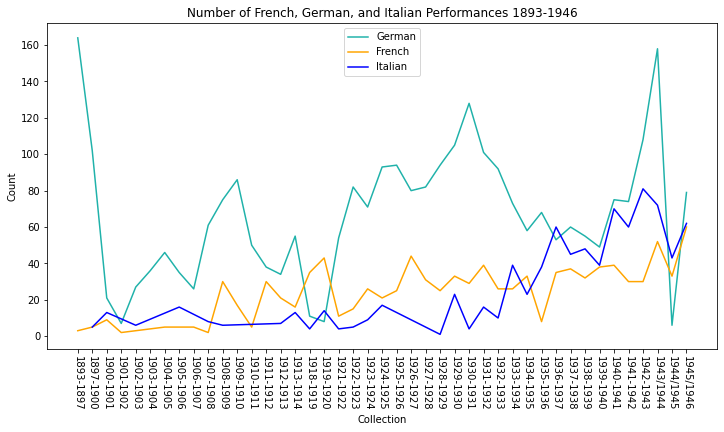

In [17]:
#create a subdataset with all French, German, and Italian performances 1893-1946
FR = df[df['Original language'] == 'FR']
DUI = df[df['Original language'] == 'DUI']
ITA = df[df['Original language'] == 'ITA']

fig, ax = plt.subplots(figsize=(12, 6))

#create 3 series for French, German, and Italian performances
counts1 = DUI['Collection'].value_counts().sort_index()
counts2 = FR['Collection'].value_counts().sort_index()
counts3 = ITA['Collection'].value_counts().sort_index()

#sort the index so that the seasons occur chronologically on the plot
counts1 = counts1.sort_index()
counts2 = counts2.sort_index()
counts3 = counts3.sort_index()

# Generate x and y data for the line plot, otherwise it doesn't plot all the index labels
x = counts1.index
y = counts1.values

x2 = counts2.index
y2 = counts2.values

x3 = counts3.index
y3 = counts3.values

#plot the line plots for each language
ax.plot(x, y, color='lightseagreen', label='German')
ax.plot(x2, y2, color='orange', label='French')
ax.plot(x3, y3, color='blue', label='Italian')

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

ax.set_xlabel('Collection')
ax.set_ylabel('Count')
ax.legend()
ax.set_title('Number of French, German, and Italian Performances 1893-1946')

plt.show()

## Normalised distribution of composers

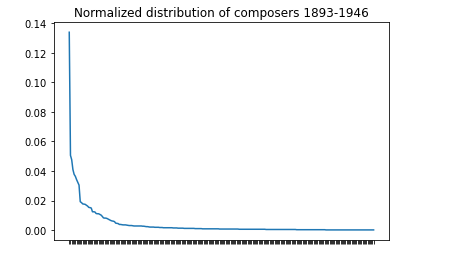

In [18]:
import warnings
warnings.filterwarnings("ignore")
comp_dis = df['Composer'].value_counts(normalize=True)
plt.plot(comp_dis)
plt.xticks(color='white')
plt.title('Normalized distribution of composers 1893-1946')
plt.show()

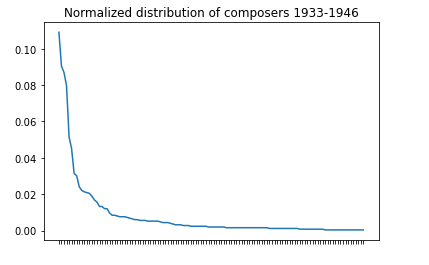

In [19]:
warnings.filterwarnings("ignore")
comp_dis = df1933_1946['Composer'].value_counts(normalize=True)
plt.plot(comp_dis)
plt.xticks(color='white')
plt.title('Normalized distribution of composers 1933-1946')
plt.show()

# How many times was Wagner played?

In [21]:
# Create an empty DataFrame to store results
wagner_performances_df = pd.DataFrame(columns=['Season', 'Performances_Wagner', 'Percentage_Wagner'])

# Get unique seasons and order them
unique_seasons = df['Season'].unique()
ordered_seasons = sorted(unique_seasons)

# Iterate over the ordered seasons
for season in ordered_seasons:
    total_performances_season = df[df['Season'] == season]['Performances_ID'].nunique()
    performances_wagner_season = df[
        (df['Season'] == season) & 
        (df['Composer'] == 'Richard Wagner') #Try other composers:Giacomo Puccini, Giuseppe Verdi, Richard Wagner, Jacques Offenbach, Charles Gounod 
    ]['Performances_ID'].nunique()
    percentage_wagner_season = (performances_wagner_season / total_performances_season) * 100
    
    # Append to the DataFrame
    wagner_performances_df = wagner_performances_df.append({
        'Season': season,
        'Performances_Wagner': performances_wagner_season,
        'Percentage_Wagner': percentage_wagner_season
    }, ignore_index=True)

# Display the resulting DataFrame
wagner_performances_df

,Season,Performances_Wagner,Percentage_Wagner
0,1893-1894,10,18.181818
1,1894-1895,15,22.38806
2,1895-1896,15,23.4375
3,1896-1897,16,26.666667
4,1897-1898,8,13.114754
5,1898-1899,13,19.117647
6,1899-1900,4,6.153846
7,1900-1901,5,5.747126
8,1901-1902,4,5.882353
9,1902-1903,2,2.739726


In [22]:
# Who was the most played in 1943-1944?
# Filter the DataFrame for the 1943-1944 season
season_1943_1944 = df[df['Season'] == '1943-1944']

# Calculate the percentage of repertoire for each composer in the 1943-1944 season
composer_percentages_1943_1944 = season_1943_1944.groupby('Composer')['Performances_ID'].nunique() / season_1943_1944['Performances_ID'].nunique() * 100

# Find the composer with the highest percentage
most_played_composer = composer_percentages_1943_1944.idxmax()
percentage_most_played_composer = composer_percentages_1943_1944.max()

print(f"The most played composer was {most_played_composer} with {percentage_most_played_composer:.6f}% of the repertoire.")

The most played composer was Richard Wagner with 20.849421% of the repertoire.


### Original premiere -> first occurence in Antwerp Opera
How long does it take (on average) for a work to be performed in Antwerp after it had its original premiere. <br>
<i>In some cases the difference in years between world premiere and first performance in antwerp will be 0 since some works had their world premiere in Antwerp

In [ ]:
eerste_voorkomen = []
for item in df.groupby('Original title')['Date'].min():
    eerste_voorkomen.append(item)


premiere = []
for item in df.groupby('Original title')['Original premiere'].min():
    premiere.append(item)


premiere = pd.to_datetime(pd.Series(premiere), dayfirst=True, errors='coerce');
eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), dayfirst=True, errors='coerce');

print(len(eerste_voorkomen) == len(premiere))


In [ ]:
result = []
x = dict(zip(premiere, eerste_voorkomen))
for key, value in x.items():
    try:
        result.append(int(value.year) - int(key.year))
    except ValueError:
        continue
    

In [ ]:
#On average, the Antwerp Opera presents a work approximately 40 years after its initial performance.
print(round(np.array(result).mean(), 2))


In [ ]:
df.columns

In [ ]:
for index, row in df.iterrows():
    if row['Multiple bill'] and pd.notnull(row['Occasion']):
        print(row['Image'])